In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
rng = np.random

/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [11]:
#Paramters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [4]:
#Train Data
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])

train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [5]:
#Graph input
X = tf.placeholder("float")
Y = tf.placeholder("float")

#Set model weight
W = tf.Variable(rng.randn(), name = "weight")
b = tf.Variable(rng.randn(), name = "bias")

In [6]:
#Construct Linear Model
pred = tf.add(tf.multiply(X, W), b)

In [8]:
#MSE
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
#Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [9]:
#Initialize the Variables
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.201587975 W= 0.4469525 b= -0.6183195
Epoch: 0100 cost= 0.187191471 W= 0.4352147 b= -0.5338784
Epoch: 0150 cost= 0.174457446 W= 0.4241749 b= -0.45445877
Epoch: 0200 cost= 0.163194060 W= 0.41379172 b= -0.3797632
Epoch: 0250 cost= 0.153231442 W= 0.40402615 b= -0.30951
Epoch: 0300 cost= 0.144419461 W= 0.39484125 b= -0.24343488
Epoch: 0350 cost= 0.136625186 W= 0.3862027 b= -0.18128939
Epoch: 0400 cost= 0.129731253 W= 0.37807786 b= -0.12284018
Epoch: 0450 cost= 0.123633623 W= 0.3704363 b= -0.0678673
Epoch: 0500 cost= 0.118240386 W= 0.36324918 b= -0.01616387
Epoch: 0550 cost= 0.113470167 W= 0.35648957 b= 0.032464474
Epoch: 0600 cost= 0.109251089 W= 0.35013202 b= 0.07820061
Epoch: 0650 cost= 0.105519459 W= 0.34415248 b= 0.12121664
Epoch: 0700 cost= 0.102218986 W= 0.33852854 b= 0.16167456
Epoch: 0750 cost= 0.099299930 W= 0.3332392 b= 0.19972584
Epoch: 0800 cost= 0.096718207 W= 0.32826445 b= 0.23551406
Epoch: 0850 cost= 0.094434857 W= 0.32358545 b= 0.26917407
Epoch: 0900 cost

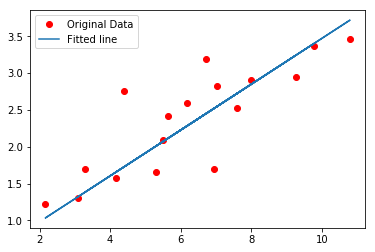

In [15]:
#Start training
with tf.Session() as sess:
    sess.run(init)
    
    #Fit all training datasets
    for epoch in range(training_epochs):
        for(x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict = {X : x, Y : y})
            
        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X : train_X, Y : train_Y})
            print "Epoch:", "%04d" % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b)
    print "Optimization Finished"
    training_cost = sess.run(cost, feed_dict = {X : train_X, Y : train_Y})
    print "Training Cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'
    
    #Graphic Display
    plt.plot(train_X, train_Y, 'ro', label = 'Original Data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label = 'Fitted line')
    plt.legend()
    plt.show()

In [13]:
#Regression